In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Downloaded crime data sets from opendata.dc.gov for 2017 and 2018 and appended them to each other

In [30]:
df2017 = pd.read_csv('2017DCCrime.csv',index_col=0)

In [40]:
df2017.drop(columns='Year',inplace=True)

In [41]:
df2018 = pd.read_csv('2018DCCrime.csv')

In [42]:
df2017.columns

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
       'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
       'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

In [43]:
df2018.columns

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
       'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
       'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

In [44]:
df = df2017.append(df2018)

In [46]:
df.YEAR.unique()

array([2017, 2018])

In [47]:
df.columns

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
       'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
       'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

In [48]:
df.reset_index()

,index,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,36,cluster 39,9700.0,violent,-76.990555,2017-03-17T13:48:02.000,homicide,midnight,129719.00,7,...,400820.00,4002 - 4015 block of cole boulevard se,2017-03-17T08:54:10.000,17043506,homicide,8E,2017-03-17T04:00:00.000Z,gun,"38.835270252028899,-76.990557729566135",38.835262
1,37,cluster 37,7406.0,violent,-76.988433,2017-01-16T10:20:53.000,homicide,midnight,131818.00,7,...,401004.00,2400 - 2599 block of elvans road se,2017-01-16T10:16:34.000,17008702,homicide,8B,2017-01-16T05:00:00.000Z,gun,"38.854178787790651,-76.988435402620382",38.854171
2,38,cluster 22,9301.0,violent,-76.983266,2017-02-07T03:24:55.000,homicide,midnight,140120.00,5,...,401451.00,1500 - 1599 block of irving street ne,2017-02-07T01:47:31.000,17021389,homicide,5B,2017-02-07T05:00:00.000Z,gun,"38.928965676851398,-76.983268079023205",38.928958
3,39,cluster 22,9302.0,violent,-76.985850,2017-09-24T21:52:00.000,homicide,midnight,139817.00,5,...,401227.00,2800 - 2899 block of 14th street ne,2017-09-24T21:49:28.000,17166280,homicide,5B,2017-09-24T04:00:00.000Z,gun,"38.926236498774585,-76.985851985194188",38.926229
4,40,cluster 18,2002.0,violent,-77.027966,2017-11-09T03:55:09.000,homicide,midnight,143086.00,4,...,397576.00,5401 - 5499 block of georgia avenue nw,2017-11-08T23:53:04.000,17194263,homicide,4C,2017-11-09T05:00:00.000Z,gun,"38.955682115034513,-77.027968462303207",38.955674
5,41,cluster 33,7707.0,violent,-76.943586,2017-12-28T19:25:57.000,homicide,midnight,134556.00,6,...,404895.00,810 - 845 block of adrian street se,2017-12-28T19:18:51.000,17222848,homicide,7E,2017-12-28T05:00:00.000Z,others,"38.878830771389659,-76.943588504585847",38.878823
6,42,cluster 26,7100.0,violent,-76.989282,2017-09-10T17:57:06.000,homicide,midnight,134605.00,1,...,400930.00,1200 - 1299 block of i street se,2017-09-10T17:56:31.000,17157080,homicide,6B,2017-10-02T04:00:00.000Z,gun,"38.879285314234053,-76.989284173140007",38.879278
7,43,cluster 36,7408.0,violent,-76.964586,2017-09-27T10:00:55.000,homicide,midnight,131528.00,7,...,403074.00,3000 - 3099 block of 30th street se,2017-09-27T09:48:46.000,17167797,homicide,8B,2017-09-28T04:00:00.000Z,others,"38.851561544748357,-76.964588654600149",38.851554
8,44,cluster 28,7504.0,violent,-76.984630,2017-10-27T14:42:58.000,homicide,midnight,132389.00,7,...,401334.00,2200 - 2258 block of hunter place se,2017-10-27T12:05:14.000,17186552,homicide,8A,2017-10-27T04:00:00.000Z,gun,"38.859322161388377,-76.984632433092514",38.859314
9,45,cluster 28,7503.0,violent,-76.989065,2017-04-17T19:42:35.000,homicide,midnight,132834.00,7,...,400949.00,2200 2270 block of mount view place se,2017-04-17T19:03:46.000,17063243,homicide,8A,2017-04-18T04:00:00.000Z,gun,"38.863331408046569,-76.989067644840517",38.863324


#### Added a new column with month as a month so I can fiter YTD data for September. Pulled it on 9/20/2018 for 2018 data. Looked at homicide only data

In [49]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [58]:
dfYTD = df[df['month'] <= 9]

In [65]:
dfYTD = dfYTD[dfYTD['offense-text'] == 'homicide']

## Summary:

### The method preferred for homicides are guns which that method alone has gone up 38% versus last year. The increase of gun related homicides in DC occured 96% of the time in Ward 8.

### The ward with the most crime increase is Ward 8 with 41% increase of homicide crime.

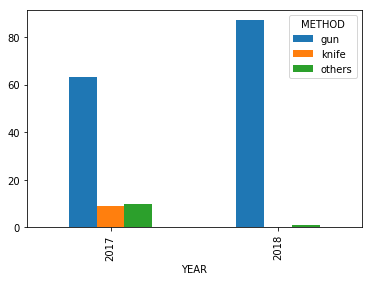

In [106]:
dfYTD.groupby('YEAR').METHOD.value_counts().unstack().plot.bar()


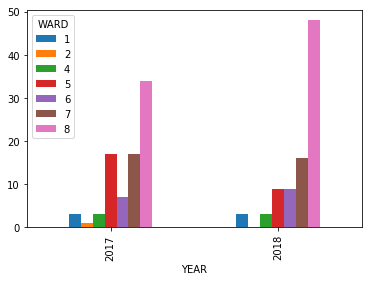

In [105]:
dfYTD.groupby('YEAR').WARD.value_counts().unstack().plot.bar()

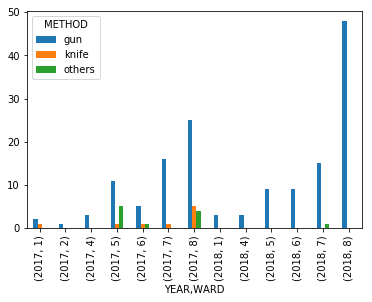

In [109]:
dfYTD.groupby(['YEAR','WARD']).METHOD.value_counts().unstack().plot.bar()